# Исследование объявлений о продаже квартир

**Описание проекта:** 
В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель исследования:** 
Проведите исследовательский анализ данных и установить параметры, влияющие на цену объектов.

**Описание данных:** 
Датасет с объявлениями о продаже квартир

**Ход исследования:**

- [1. Откройте файл с данными и изучите общую информацию](#загрузка)
- [2. Выполните предобработку данных](#предобработка)
- [3. Добавьте в таблицу новые столбцы](#новые)
- [4. Проведите исследовательский анализ данных](#исслед)
- [5. Общий вывод](#вывод)

**Общий вывод:**  
В основном площадь квартир от 38 до 62 квадратных метров. Цена варьируется от 3 до 6 миллионов при средней примерно около 4,5-4,7 млн. В большинстве это 1 или 2-комнантые квартиры в 5 или 9-этажном доме. В среднем срок продажи квартиры 171 дней. Однако медиана 90 дней. Такая разница потому что у нас есть объявления, которые висят годами. Больше всего на общую стоимость объекта влияют общая площадь, жилая площадь и количество комнат.
В результате оценки топ-10 населенных пунктов по количествам объявлений самая большая стоимость 1 квадратного метра в Санкт-Петербурге. В топ-3 Пушкин и Кудрово. Цена на квартиры с каждым пройденным от центра Санкт-Петербурга километром уменьшается с 8 миллионов до 4 при удалении на 28 километров.

<a id="загрузка"></a>
## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1) Откроем файл real_estate_data, для корректной открытия в датафрейм используем separate \t. 
2) Посмотрим через метод info и describe общие данные по датафрейму

In [2]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Построим гистограммы каждого столбца. Мы видим много выбросов на графиках. Например, тут нам очень мешает пиковое значение в графе last_price Далее начнем предобработку данных

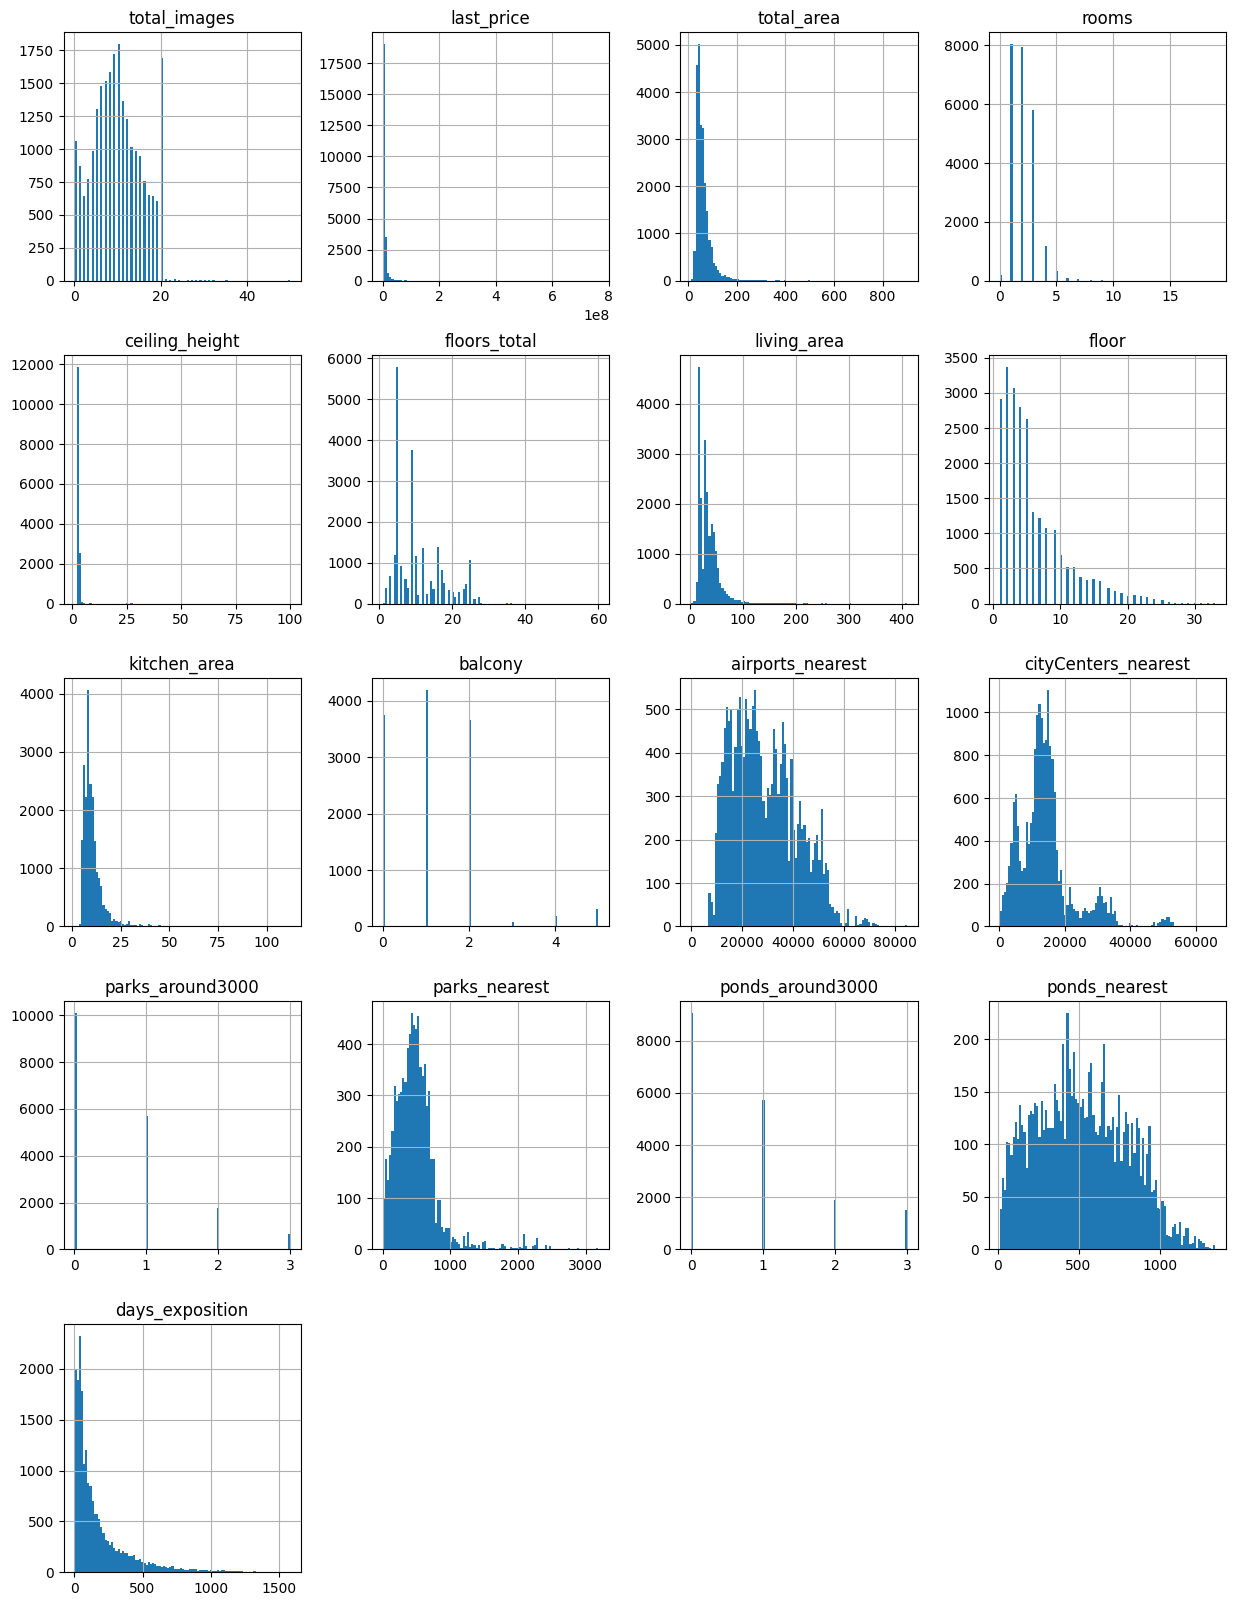

In [5]:
df.hist(figsize=(15, 20), bins = 100);

**Вывод по разделу:**  
- 23700 строк, в самых важных столбцах небольшое количество пропусков. Есть много аномальных значений.
- Наименование столбцов удобное для работы. Кое-где необходимо изменить тип данных, тоже для удобства.

## Выполните предобработку данных

Начнем с заполнением / удалением пропусков, их у нас очень много

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

первым делом удалим строчки, где в столбце "название населённого пункта" стоят пропуски. Мы не можем определить, где находится квартира даже через колонку cityCenters_nearest, так как сам город не в форме круга, чтобы мы могли до удалению от центра понять, в городе квартира или нет. При одинаковом значении она может быть как в городе, так и вне его.
Удалим строки по столбцу 'floors_total', их всего 52

In [7]:
df = df.dropna(subset = ['locality_name', 'floors_total'])
df[['locality_name', 'floors_total']].isna().sum()

locality_name    0
floors_total     0
dtype: int64

В столбце ceiling_height (высота потолков) вместо пропусков вставим медианное значение по данной колонке. Данное значение 2.65

In [8]:
df.loc[:, 'ceiling_height'] = df.loc[:, 'ceiling_height'].fillna(df['ceiling_height'].median())
print(f"медианная высота потолков: {df['ceiling_height'].median()} м")

медианная высота потолков: 2.65 м


Там, где NaN в столбце is_apartment, меняем на False (что означает, что данная квартира не апартаменты). Обычно если это апартаменты, то это указывается в объявлении

In [9]:
df['is_apartment'] = df['is_apartment'].astype(bool)
df.loc[:, 'is_apartment'] = df.loc[:, 'is_apartment'].fillna(False)
df['is_apartment'].isna().sum()

0

Если в объявлении нет ничего про балкон - меняет просто на 0, то есть на его отсутствие

In [10]:
df.loc[:, 'balcony'] = df.loc[:, 'balcony'].fillna(0)
df['balcony'].isna().sum()

0

Так как из столбца living_area нельзя удалять строки с пропусками из датафрейма, попробуем порассуждать:
У нас есть total_area для каждого объявления. Логически преположим, что living_area должна быть в каждой квартире. Мы можем высчитать, где у нас есть данные и по total_area и по living_area, какой процент из общей площади квартиры занимает жилая площадь. И взять среднее по всем квартирам

In [11]:
perc_liv = (df['living_area'] / df['total_area']).mean().round(2)
perc_liv

0.56

в среднем по всем квартирам жилая площадь занимает 56% от всей площади квартиры. Заменим пропуски в living_area

In [12]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * perc_liv)

Заменим все пропуски в данных по kitchen_area на 0, так как часто кухонь может и не быть в помещении

In [13]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Теперь с пропусками остались:
1) близость / расстояние до аэропортов, парков, центра города и водоемов так же без знаний нельзя заменить  
2) days_exposition (сколько дней было размещено объявление (от публикации до снятия)) - где пропуски, значит, что объявление всё еще висит

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest      18

посмотрим на тип данных, в таблице, что можем поменять
1) поменяем first_day_exposition на datetime, так как тут дата  
2) поменяем floors_total, balcony в int64, лишние символы нам тут не к чему

In [15]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df[['floors_total', 'balcony']] = df[['floors_total', 'balcony']].astype(int)

df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


в столбце locality_name мы видим много населенных пунктов, которые записаны по разному, хотя значат одно и то же. Переименуем часть из них

In [16]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [17]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', 'пгт')

In [18]:
df.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2017-11-10 08:59:53.125398016,2.070656,2.724530,10.675875,34.536243,5.878124,9.565173,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-15 00:00:00,1.000000,2.600000,5.000000,19.000000,2.000000,6.300000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,2018-08-26 00:00:00,3.000000,2.700000,16.000000,42.000000,8.000000,11.410000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.681156,1.091093e+07,35.657060,NaN,1.078591,0.991026,6.594823,22.324695,4.871485,6.407798,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782


Теперь избавимся от выбросов. Начнем с графы last_price. Вспомним, что межквартильный размах IQR = Q3-Q1. А формула Q1 - 1.5 * IQR, Q3 + 1.5 * IQR, где Q1 и Q3 это 25-й и 75-й процентиль соответственно, как раз и есть наши границы, всё что выше которых и является выбросами

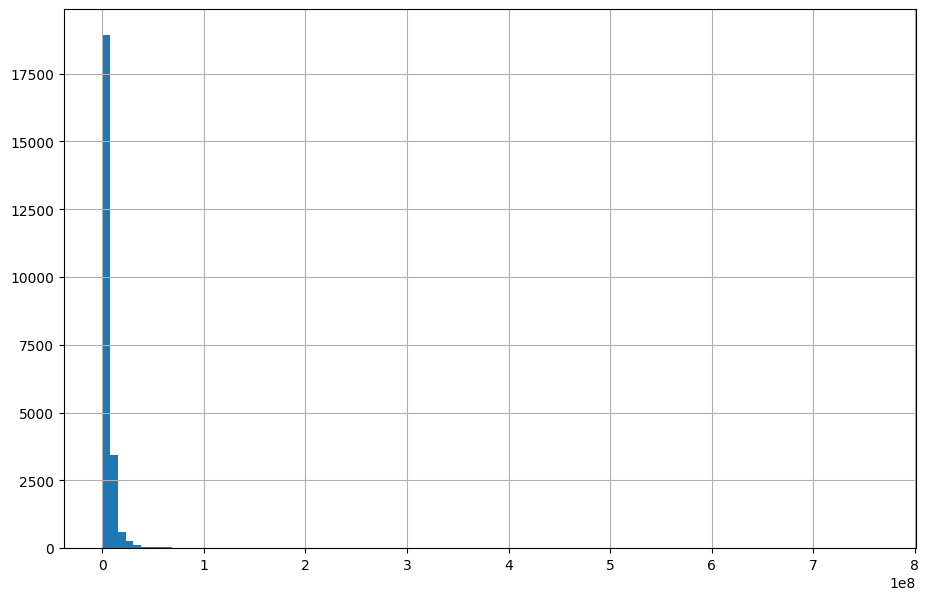

In [19]:
df['last_price'].hist(bins = 100, figsize=(11, 7));

Введем лимит по оси Y для того, чтобы все данные графика было видно. По графику видим, что "усы" вверх доходят где-то до 1.15-1.20. Всё что выше отсеим

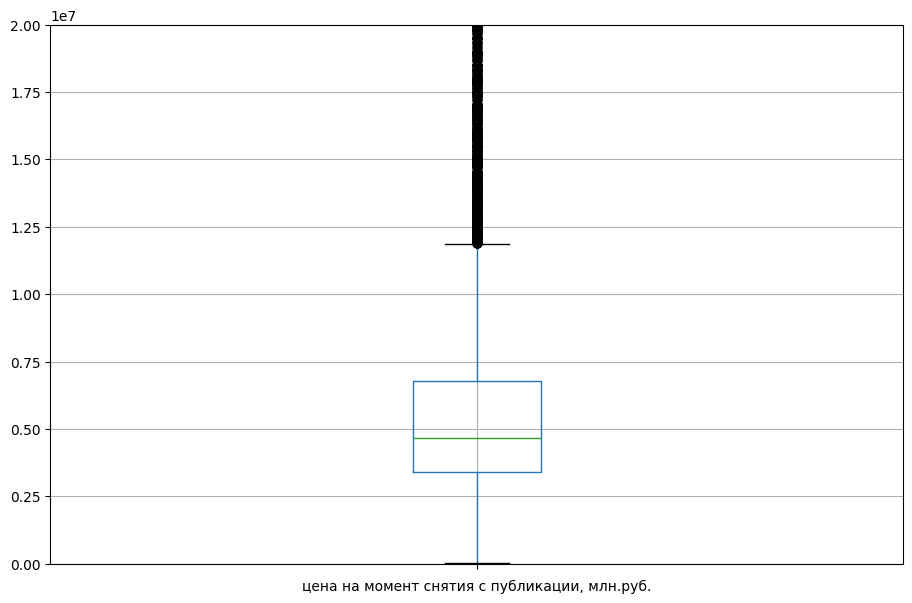

In [20]:
df.boxplot(column = 'last_price', figsize=(11, 7))
plt.ylim(0,20000000)
plt.xlabel('цена на момент снятия с публикации, млн.руб.')
plt.xticks([1], ['']);

Избавимся от выбросов и запишем это в новый датафрейм

In [21]:
Q1 = df['last_price'].quantile(0.25)
Q3 = df['last_price'].quantile(0.75)
IQR = Q3 - Q1

filtered_df = df[(df['last_price'] >= Q1 - 1.5 * IQR) & (df['last_price'] <= Q3 + 1.5 * IQR)]
display(filtered_df.shape)

print(f"Максимальное значение {filtered_df['last_price'].max()} рублей")

(21519, 22)

Максимальное значение 11866860.0 рублей


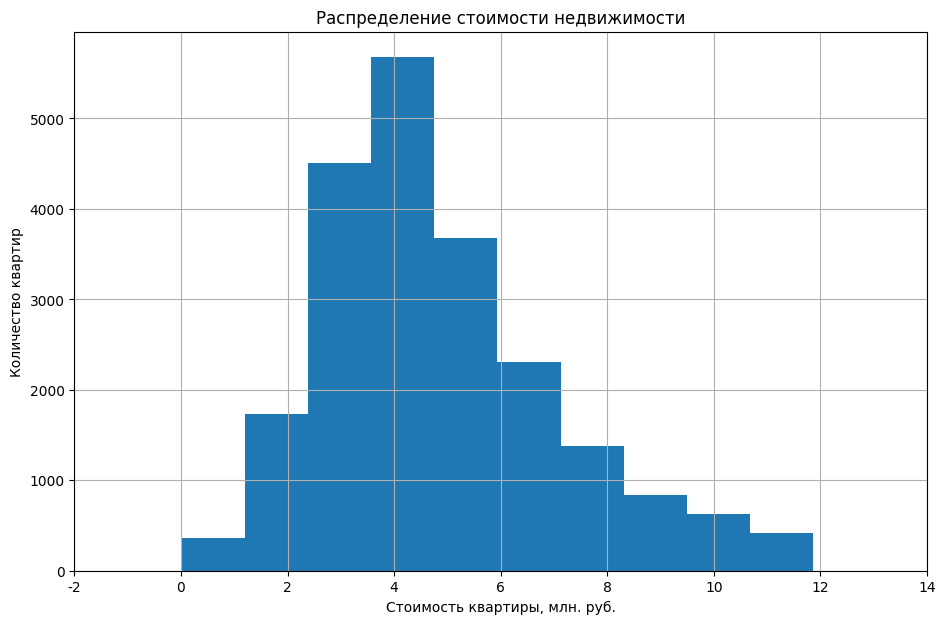

In [22]:
filtered_df['last_price'].hist(figsize=(11, 7))
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость квартиры, млн. руб.')
plt.ylabel('Количество квартир')

ax = plt.gca()
x_ticks = ax.get_xticks() 
ax.set_xticks(x_ticks)
ax.set_xticklabels([int(tick / 1_000_000) for tick in x_ticks]);

После отсеивания выбросов видим, что у нас нормальное распределение, и все значения лежат в промежутке от 0 до 12 млн. руб.

То же самое видим в столбце total_area, отсеим хвосты. Все что выше примерно 110 метров - отбросим

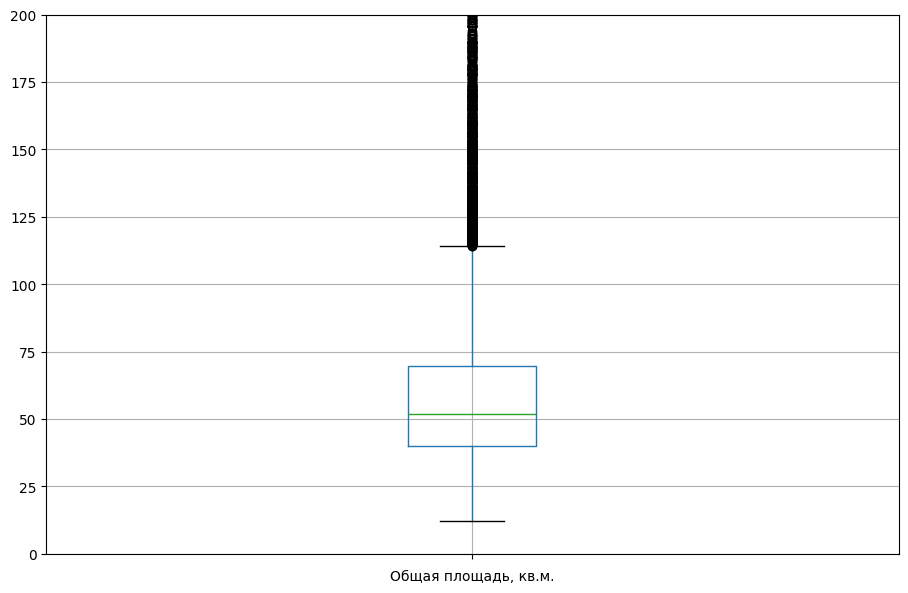

In [23]:
df.boxplot(column = 'total_area', figsize=(11, 7))
plt.ylim(0,200)
plt.xlabel('Общая площадь, кв.м.')
plt.xticks([1], ['']);

In [24]:
Q1 = df['total_area'].quantile(0.25)
Q3 = df['total_area'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = filtered_df[(filtered_df['total_area'] >= Q1 - 1.5 * IQR) & (filtered_df['total_area'] <= Q3 + 1.5 * IQR)]
filtered_df.shape

(21338, 22)

аналогично проделаем для living_area и kitchen_area. Отбросим всё что выше усов

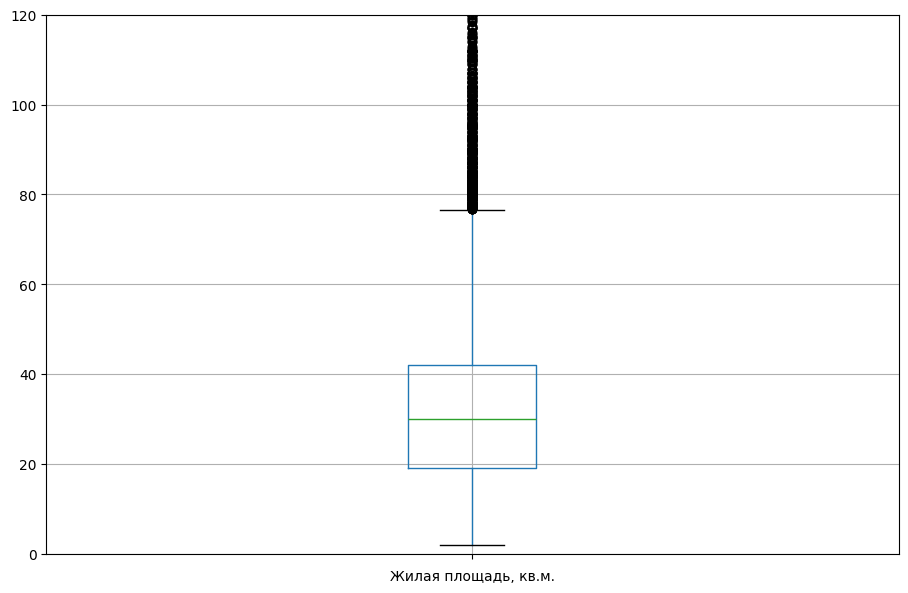

In [25]:
df.boxplot(column = 'living_area', figsize=(11, 7))
plt.ylim(0,120)
plt.xlabel('Жилая площадь, кв.м.')
plt.xticks([1], ['']);

In [26]:
Q1 = df['living_area'].quantile(0.25)
Q3 = df['living_area'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = filtered_df[(filtered_df['living_area'] >= Q1 - 1.5 * IQR) & (filtered_df['living_area'] <= Q3 + 1.5 * IQR)]
filtered_df.shape

(21311, 22)

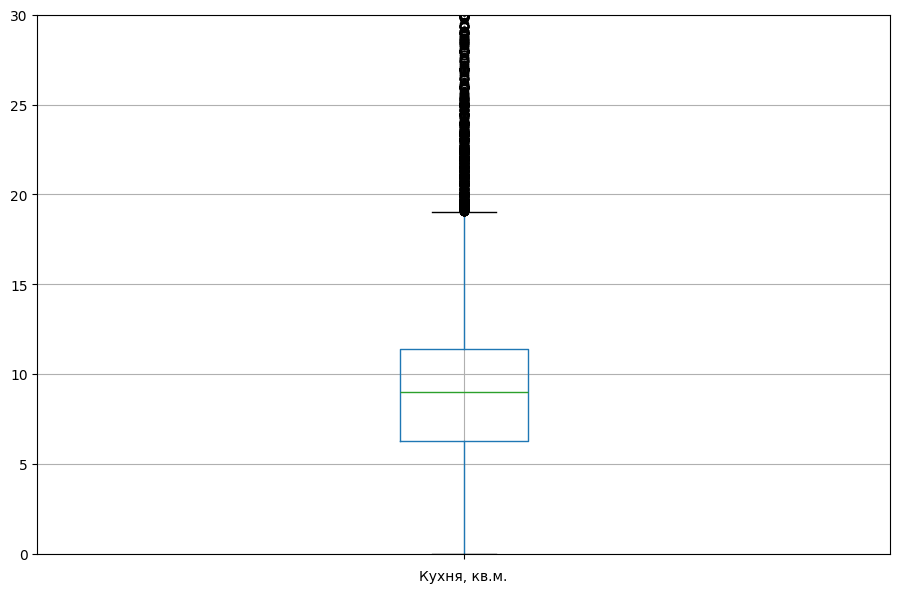

In [27]:
df.boxplot(column = 'kitchen_area', figsize=(11, 7))
plt.ylim(0,30)
plt.xlabel('Кухня, кв.м.')
plt.xticks([1], ['']);

In [28]:
Q1 = df['kitchen_area'].quantile(0.25)
Q3 = df['kitchen_area'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = filtered_df[(filtered_df['kitchen_area'] >= Q1 - 1.5 * IQR) & (filtered_df['kitchen_area'] <= Q3 + 1.5 * IQR)]
filtered_df.shape

(20852, 22)

In [29]:
filtered_df.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,20852.000000,2.085200e+04,20852.000000,20852,20852.000000,20852.000000,20852.000000,20852.000000,20852.000000,20852.000000,20852.000000,15489.000000,15500.000000,15501.000000,6394.000000,15501.000000,7375.000000,18323.000000
mean,9.665692,4.734780e+06,52.111304,2017-11-18 03:13:54.912718080,1.904613,2.694193,10.769902,29.974429,5.873489,8.308015,0.593948,28936.516431,15098.661806,0.550739,487.855020,0.696471,533.574915,171.271844
min,0.000000,4.300000e+05,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,16.000000,1.000000
25%,6.000000,3.300000e+06,38.700000,2017-05-24 00:00:00,1.000000,2.600000,5.000000,18.300000,2.000000,6.200000,0.000000,17944.000000,10760.500000,0.000000,289.000000,0.000000,317.000000,43.000000
50%,9.000000,4.350000e+06,48.200000,2017-12-17 12:00:00,2.000000,2.650000,9.000000,29.000000,4.000000,8.400000,0.000000,27164.000000,13704.000000,0.000000,456.000000,0.000000,522.000000,90.000000
75%,14.000000,5.850000e+06,62.400000,2018-08-28 00:00:00,3.000000,2.650000,16.000000,38.525000,8.000000,10.600000,1.000000,37781.000000,16741.000000,1.000000,613.750000,1.000000,744.500000,217.000000
max,39.000000,1.186686e+07,114.200000,2019-05-03 00:00:00,6.000000,32.000000,60.000000,76.500000,33.000000,19.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.523189,2.132639e+06,17.339106,NaN,0.887334,0.795557,6.615548,12.373920,4.882045,3.856185,0.939567,13052.947812,8507.384577,0.760447,326.215956,0.881088,277.033444,209.610600


В столбце ceiling_height аномально высокие потолки, вероятно точка поставлена не там

In [30]:
filtered_df['ceiling_height'].sort_values(ascending = False).head(25)

3148     32.0
22336    32.0
21377    27.5
17857    27.0
22938    27.0
10773    27.0
4876     27.0
5246     27.0
21824    27.0
5807     27.0
20478    27.0
5669     26.0
355      25.0
9379     25.0
6246     25.0
11285    25.0
4643     25.0
18545    25.0
14382    25.0
5076     24.0
20507    22.6
17496    20.0
15061    14.0
22309    10.3
5863      8.3
Name: ceiling_height, dtype: float64

найдем все значения, где нужно изменить высоту потолков, начиная с 10 метров. Поделим на 10, так как наверняка это ошибка

In [31]:
filtered_df.loc[filtered_df['ceiling_height'] >= 10, 'ceiling_height'] = \
    filtered_df.loc[filtered_df['ceiling_height'] >= 10, 'ceiling_height'] / 10

In [32]:
filtered_df['ceiling_height'].sort_values(ascending = False).head()

5863     8.3
17442    8.0
3474     8.0
15743    8.0
21227    5.8
Name: ceiling_height, dtype: float64

проверяем, что всё прошло успешно. Теперь максимальная высота потолка 8.3 метров

обратим внимание так же на аномально низкие значения. Наверняка они были внесены на скорую руку или с ошибкой / округлением. Эти значения заменим на медиану - 2.65 метров

In [33]:
filtered_df[filtered_df['ceiling_height'] < 2.4].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
227,13,2200000.0,47.00,2018-01-12,3,2.34,5,26.32,1,True,...,0.0,0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
552,11,2999000.0,33.50,2017-03-30,1,2.00,15,17.50,6,True,...,6.5,0,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
1582,4,4100000.0,45.60,2016-01-13,2,2.30,9,28.40,8,False,...,7.0,2,Санкт-Петербург,49152.0,14977.0,1.0,489.0,1.0,525.0,329.0
2572,4,2400000.0,62.00,2018-12-27,3,2.00,5,40.00,4,True,...,6.0,1,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18,1,2.00,18,16.60,9,True,...,8.8,2,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0


In [34]:
 filtered_df.loc[filtered_df['ceiling_height'] < 2.4, 'ceiling_height'] =  df['ceiling_height'].median()

In [35]:
filtered_df.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,20852.000000,2.085200e+04,20852.000000,20852,20852.000000,20852.000000,20852.000000,20852.000000,20852.000000,20852.000000,20852.000000,15489.000000,15500.000000,15501.000000,6394.000000,15501.000000,7375.000000,18323.000000
mean,9.665692,4.734780e+06,52.111304,2017-11-18 03:13:54.912718080,1.904613,2.669136,10.769902,29.974429,5.873489,8.308015,0.593948,28936.516431,15098.661806,0.550739,487.855020,0.696471,533.574915,171.271844
min,0.000000,4.300000e+05,12.000000,2014-11-27 00:00:00,0.000000,2.400000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,16.000000,1.000000
25%,6.000000,3.300000e+06,38.700000,2017-05-24 00:00:00,1.000000,2.600000,5.000000,18.300000,2.000000,6.200000,0.000000,17944.000000,10760.500000,0.000000,289.000000,0.000000,317.000000,43.000000
50%,9.000000,4.350000e+06,48.200000,2017-12-17 12:00:00,2.000000,2.650000,9.000000,29.000000,4.000000,8.400000,0.000000,27164.000000,13704.000000,0.000000,456.000000,0.000000,522.000000,90.000000
75%,14.000000,5.850000e+06,62.400000,2018-08-28 00:00:00,3.000000,2.650000,16.000000,38.525000,8.000000,10.600000,1.000000,37781.000000,16741.000000,1.000000,613.750000,1.000000,744.500000,217.000000
max,39.000000,1.186686e+07,114.200000,2019-05-03 00:00:00,6.000000,8.300000,60.000000,76.500000,33.000000,19.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.523189,2.132639e+06,17.339106,NaN,0.887334,0.189928,6.615548,12.373920,4.882045,3.856185,0.939567,13052.947812,8507.384577,0.760447,326.215956,0.881088,277.033444,209.610600


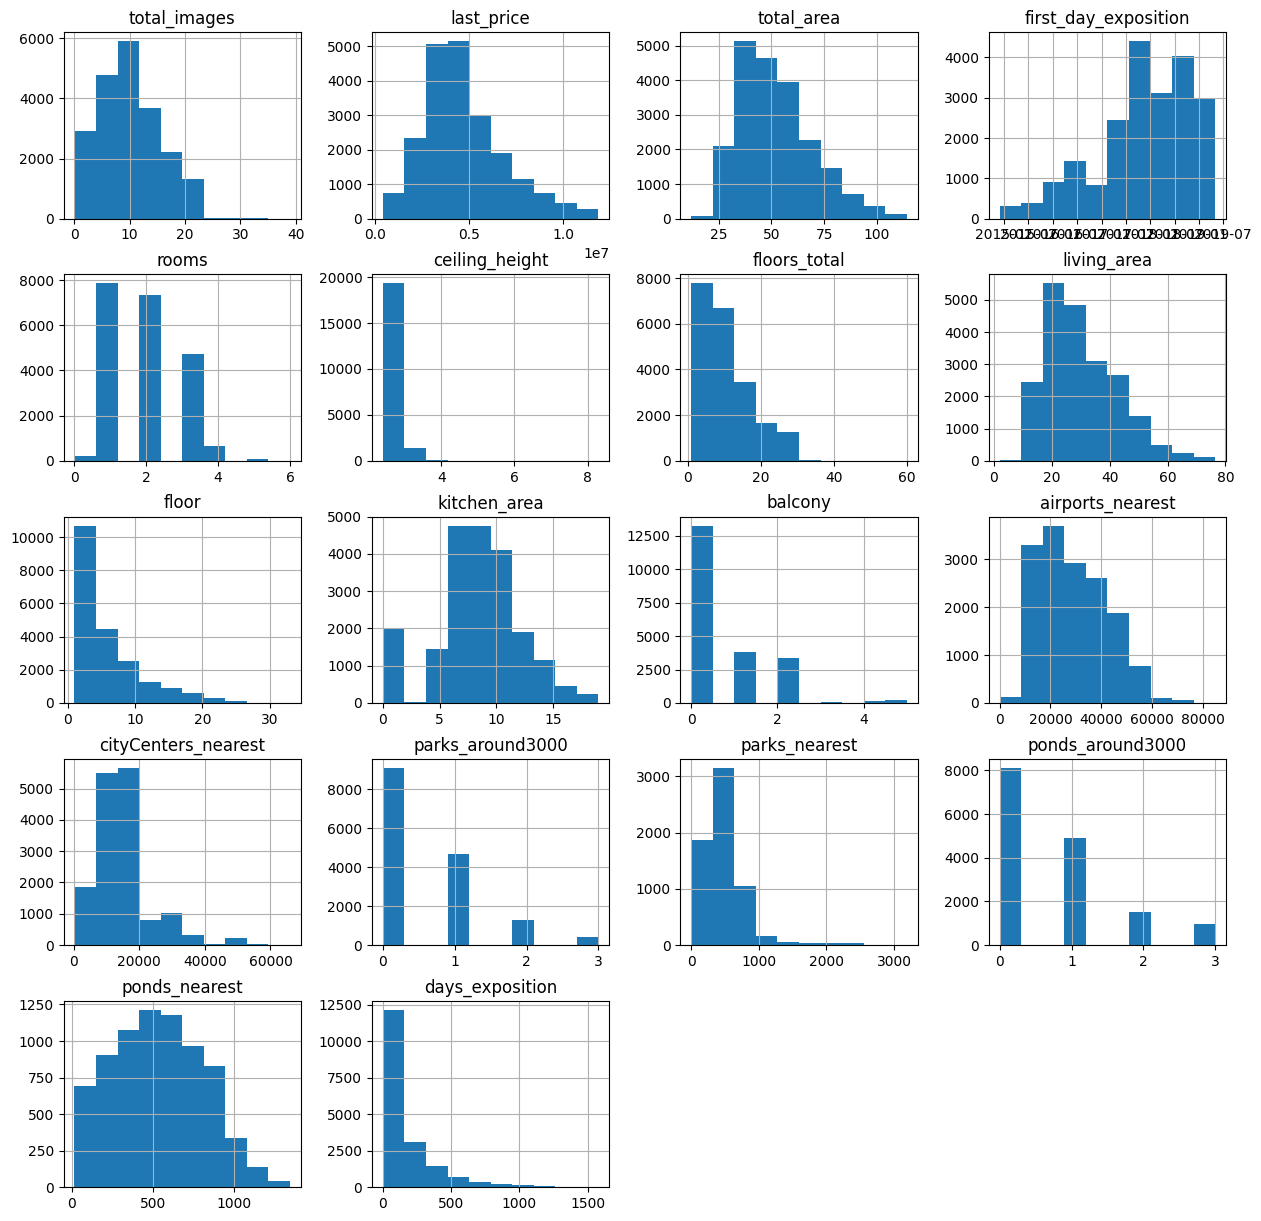

In [36]:
filtered_df.hist(figsize=(15, 15));

**Вывод по предобработке данных:**
- Были удалены строки, где в стобцах 'locality_name', 'floors_total' были пропуски. Они важны для анализа, а удалилось менее 0.5%
- Были заменены аномальные высокие значения высоты потолков на правильные (ошибка при записи данных). Аномально низкие на медианную высоту потолка (тоже скорей всего ошибка при записи). И пропущенные значения так же заменили на медиану
- Пропущенные значения в столбцах balcony и is_apartment заменили на булево False
- В столбце с пропусками в living_area избавились от пропусков, вместо них вставили среднее процентное отношение от общей площади на основе данных по всем имеющимся у нас данных
- В столбце с пропусками в kitchen_area вставили 0, так как бывает, что кухонь нет в помещении
- Избавились от неявных дубликатов в графе с наименованием населенных пунктов
- Привели столбцы датафрейма к удобным для нас форматам\
- Удалили аномально высокие значения в интересующих нас столбцах, всё, что выходит за пределы "усов". Выбросы

<a id="новые"></a>
## Добавьте в таблицу новые столбцы

Добавим:
1) столбец price_meter (цена одного квадратного метра)
2) день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
3) месяц публикации объявления
4) год публикации объявления

In [37]:
filtered_df['price_meter'] = (filtered_df['last_price'] / filtered_df['total_area']).round(2)
filtered_df['weekday'] = filtered_df['first_day_exposition'].dt.weekday
filtered_df['month'] = filtered_df['first_day_exposition'].dt.month
filtered_df['year'] = filtered_df['first_day_exposition'].dt.year
filtered_df = filtered_df.reset_index(drop = True)
filtered_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday,month,year
0,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600,1,True,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
1,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300,4,True,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
2,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.400,5,True,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018
3,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.600,6,True,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,3,11,2017
4,5,7915000.0,71.6,2019-04-18,2,2.65,24,40.096,22,True,...,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69,3,4,2019


Создадим столбец "тип этажа квартиры" (значения — «‎первый», «последний», «другой»). Для этого использует функцию

In [38]:
def floor_category(row):
    if row['floor'] == 1:
        return 'first'
    if row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'another'
filtered_df['floor_type'] = filtered_df.apply(floor_category, axis = 1)
filtered_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday,month,year,floor_type
0,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600,1,True,...,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,first
1,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300,4,True,...,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,another
2,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.400,5,True,...,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,another
3,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.600,6,True,...,0.0,NaN,0.0,NaN,155.0,99195.71,3,11,2017,another
4,5,7915000.0,71.6,2019-04-18,2,2.65,24,40.096,22,True,...,0.0,NaN,0.0,NaN,NaN,110544.69,3,4,2019,another


Создадим столбец "расстояние до центра города в километрах"

In [39]:
filtered_df['city_сenter_km'] = (filtered_df['cityCenters_nearest'] / 1000).round().astype('Int64')
filtered_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday,month,year,floor_type,city_сenter_km
0,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,first,19
1,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,another,14
2,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.400,5,True,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,another,<NA>
3,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.600,6,True,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,another,19
4,5,7915000.0,71.6,2019-04-18,2,2.65,24,40.096,22,True,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,another,12


**Вывод по разделу:**
- Создали дополнительные столбцы для исследований

<a id="исслед"></a>
## Проведите исследовательский анализ данных

### Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров.

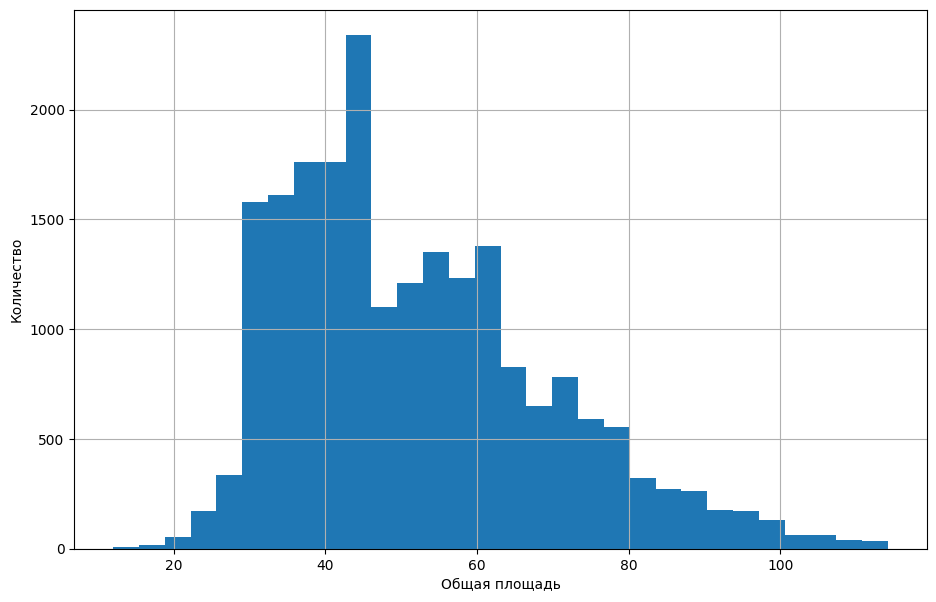

In [40]:
filtered_df['total_area'].hist(bins = 30, figsize=(11, 7))
plt.xlabel('Общая площадь')
plt.ylabel('Количество');

In [41]:
filtered_df['total_area'].describe()

count    20852.000000
mean        52.111304
std         17.339106
min         12.000000
25%         38.700000
50%         48.200000
75%         62.400000
max        114.200000
Name: total_area, dtype: float64

In [42]:
filtered_df['total_area'].mode()

0    45.0
Name: total_area, dtype: float64

После предобработки данных 50% квартир общей площадью находятся в промежутке от 38.6 до 62.2 квадратных метров. Самая популярная площадь - 45 кв.метров. Тут нормальное распределение.

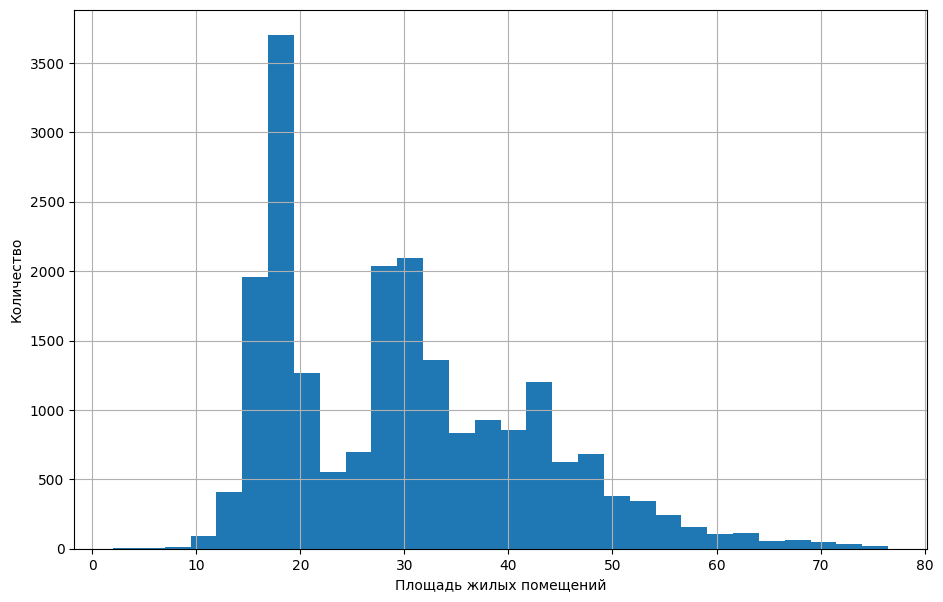

In [43]:
filtered_df['living_area'].hist(bins = 30, figsize=(11, 7))
plt.xlabel('Площадь жилых помещений')
plt.ylabel('Количество');

In [44]:
filtered_df['living_area'].describe()

count    20852.000000
mean        29.974429
std         12.373920
min          2.000000
25%         18.300000
50%         29.000000
75%         38.525000
max         76.500000
Name: living_area, dtype: float64

In [45]:
filtered_df['living_area'].mode()

0    18.0
Name: living_area, dtype: float64

А в жилых помещениях у нас бимодальное распередение - есть две вершины. Одна 18 метров (она же мода). Второе около 30

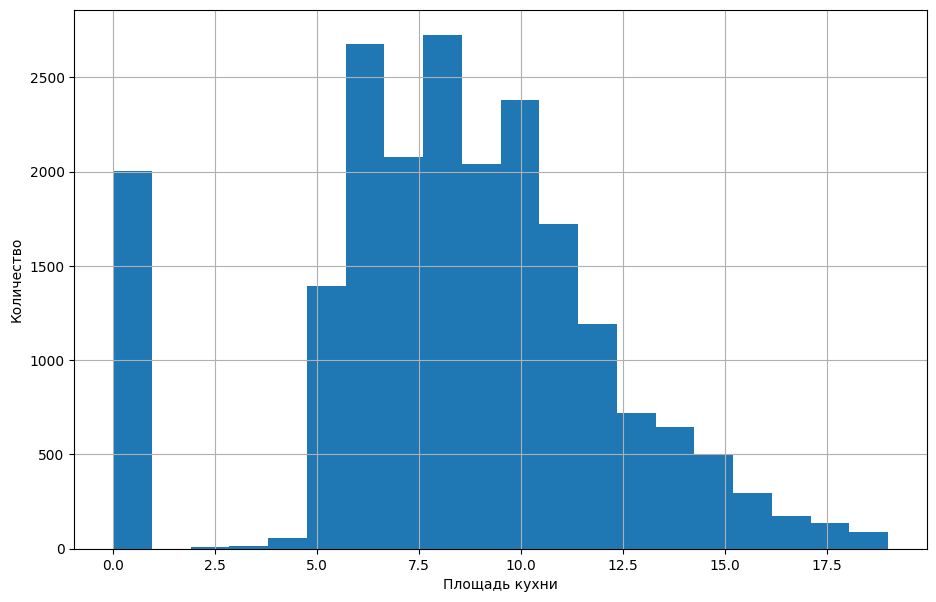

In [46]:
filtered_df['kitchen_area'].hist(bins = 20, figsize=(11, 7))
plt.xlabel('Площадь кухни')
plt.ylabel('Количество');

In [47]:
filtered_df['kitchen_area'].describe()

count    20852.000000
mean         8.308015
std          3.856185
min          0.000000
25%          6.200000
50%          8.400000
75%         10.600000
max         19.000000
Name: kitchen_area, dtype: float64

Площадь кухонь в основном до 10 квадратных метров (медиана и среднее меньше 8.4 метров), нормальное распределение. Есть помещения вообще без кухонь

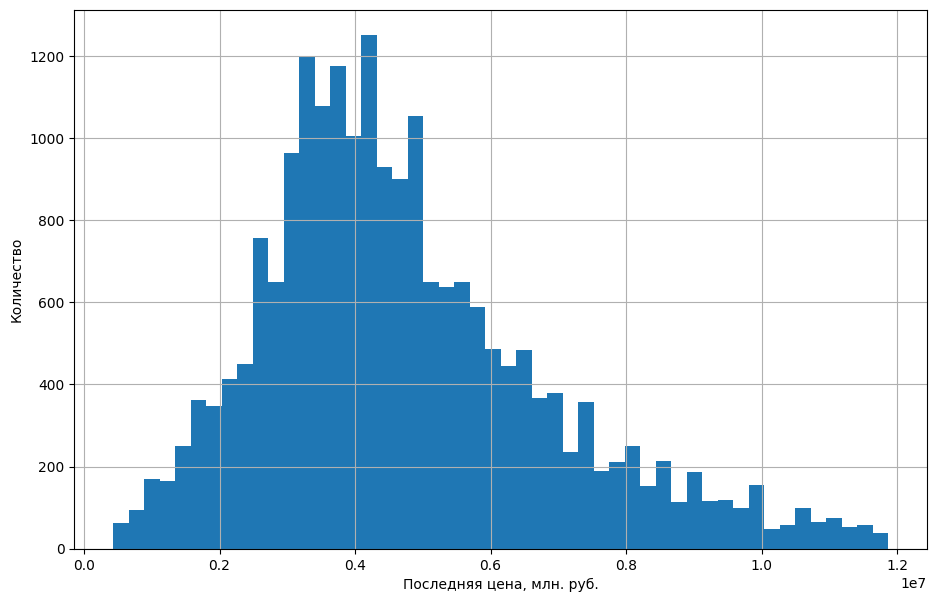

In [48]:
filtered_df['last_price'].hist(bins = 50, figsize=(11, 7))
plt.xlabel('Последняя цена, млн. руб.')
plt.ylabel('Количество');

In [49]:
filtered_df['last_price'].describe().apply(lambda x: f'{x:,.0f}')

count        20,852
mean      4,734,780
std       2,132,639
min         430,000
25%       3,300,000
50%       4,350,000
75%       5,850,000
max      11,866,860
Name: last_price, dtype: object

In [50]:
filtered_df['last_price'].mode()

0    4500000.0
Name: last_price, dtype: float64

Цена на большинство квартир варьируется от 3 до 6 миллион, мода 4,5 млн, средняя цена 4,7 после отсечения хвостов

Для дискретных величин метод hist() не очень подойдет, воспользуется столбчатой диаграммой

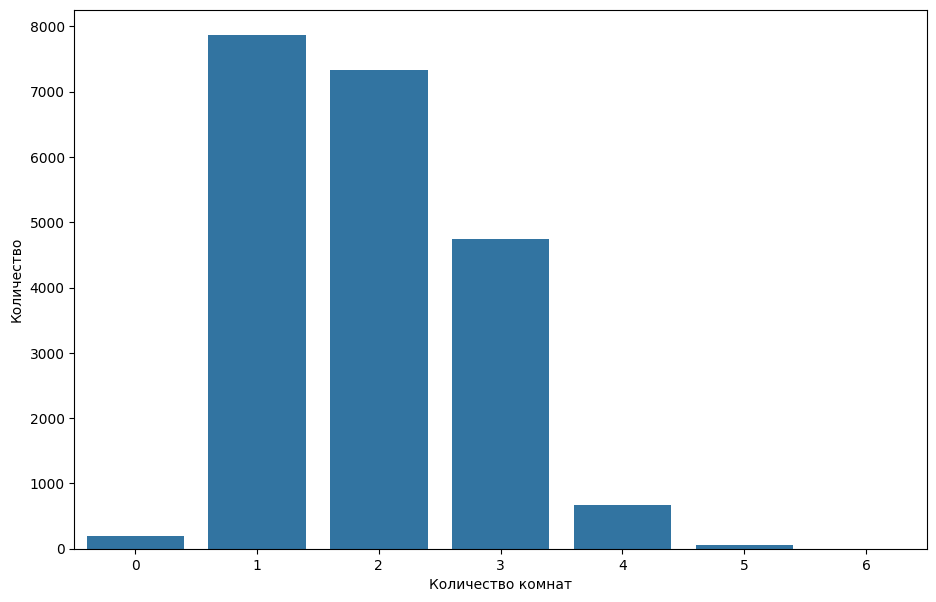

In [51]:
plt.figure(figsize=(11, 7))
sns.countplot(data = filtered_df, x = 'rooms')
plt.xlabel('Количество комнат')
plt.ylabel('Количество');

Большая часть квартир с 1 комнатой. Немногим меньше идет 2, потом 3 комнаты. 0,4,5 или 6 комнат сильно меньше

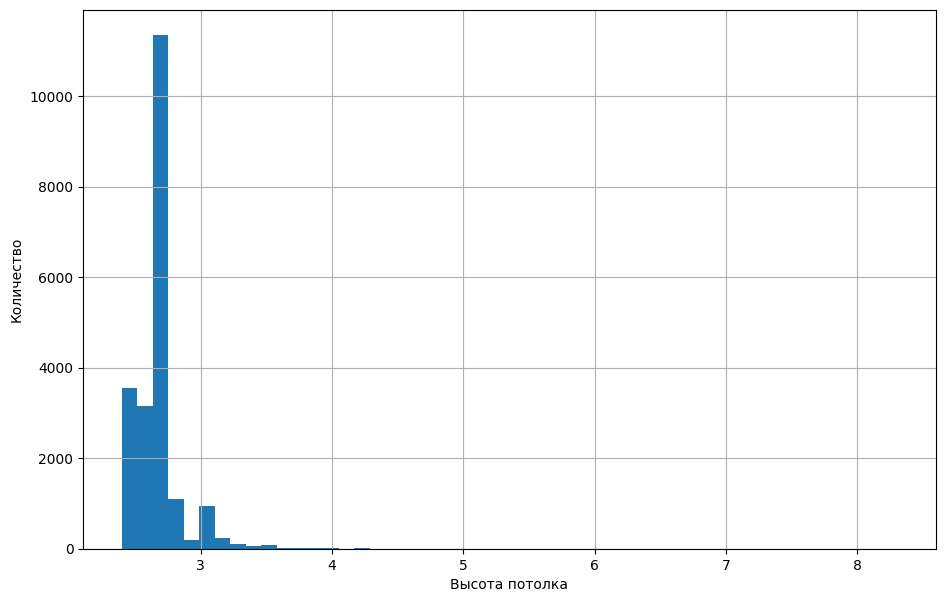

In [52]:
filtered_df['ceiling_height'].hist(bins = 50, figsize=(11, 7))
plt.xlabel('Высота потолка')
plt.ylabel('Количество');

Почти все потолки находятся в промежутке между 2 и 4 метрами

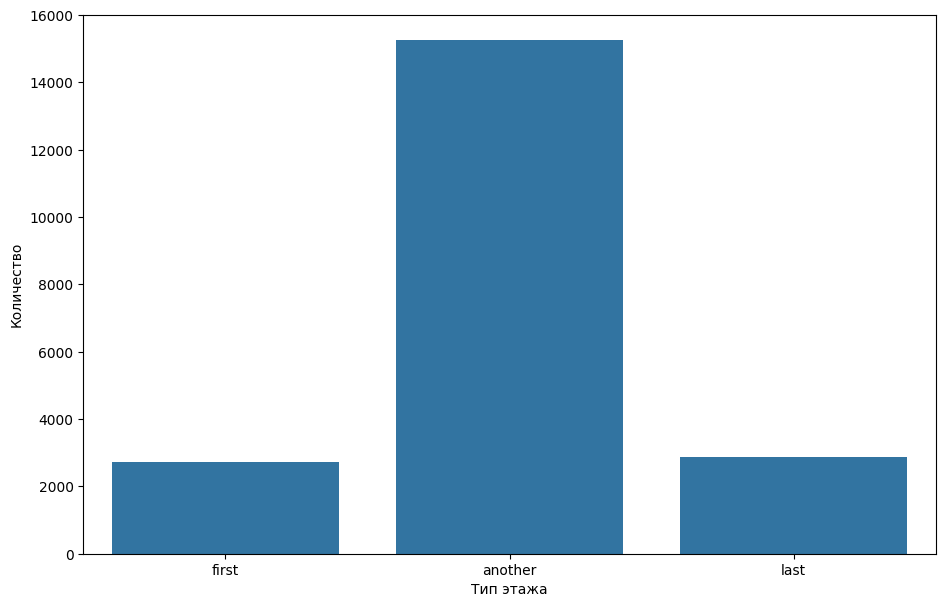

In [53]:
plt.figure(figsize=(11, 7))
sns.countplot(data = filtered_df, x = 'floor_type')
plt.xlabel('Тип этажа')
plt.ylabel('Количество');

In [54]:
filtered_df['floor_type'].value_counts()

floor_type
another    15249
last        2872
first       2731
Name: count, dtype: int64

Большинство квартир находятся не первых/последних этажах. Притом квартир на первых и последних этажах примерно поровну

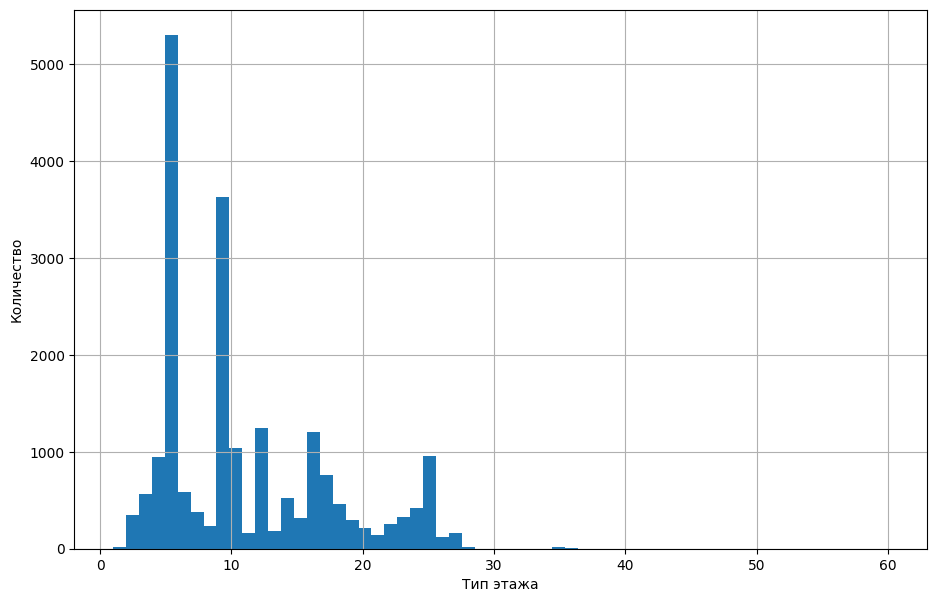

In [55]:
filtered_df['floors_total'].hist(bins = 60, figsize=(11, 7))
plt.xlabel('Тип этажа')
plt.ylabel('Количество');

In [56]:
filtered_df['floors_total'].value_counts().head()

floors_total
5     5293
9     3628
12    1240
16    1208
10    1042
Name: count, dtype: int64

Большинство квартир на продажу продаются в пятиэтажках. Далее идут девятиэтажки. Ничего удивительного, такая этажность самая популярная в стране. Вообще продажи в основном идут от 5-этажок до 28-этажек. Но бывают продают и в более высотных зданиях

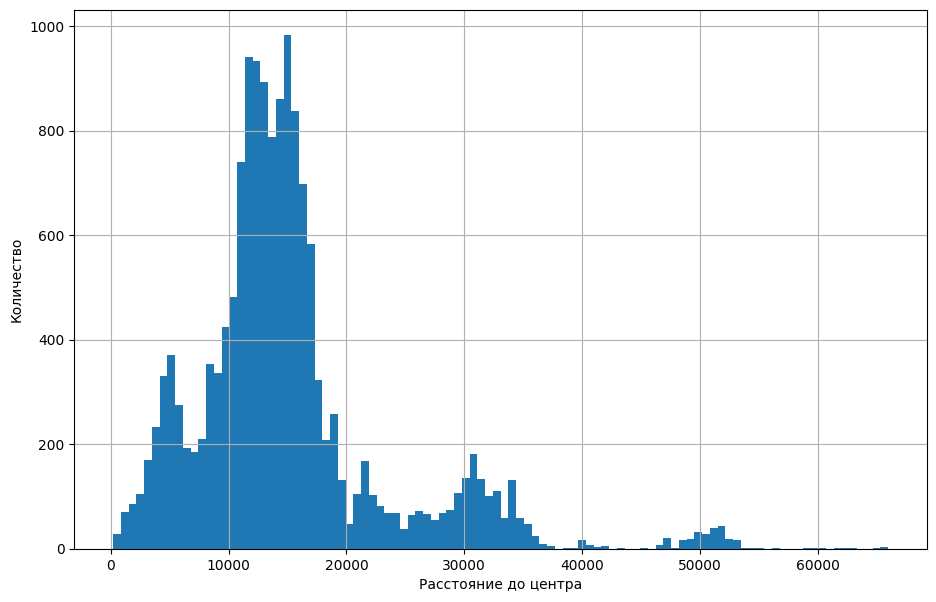

In [57]:
filtered_df['cityCenters_nearest'].hist(bins = 100, figsize=(11, 7))
plt.xlabel('Расстояние до центра')
plt.ylabel('Количество');

In [58]:
filtered_df['cityCenters_nearest'].describe()

count    15500.000000
mean     15098.661806
std       8507.384577
min        208.000000
25%      10760.500000
50%      13704.000000
75%      16741.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

У нас тут примерно 5000 значений неизвестно. Строим из того что есть. В основном расстояние до центра города у нас от 10000 до 17000 метров

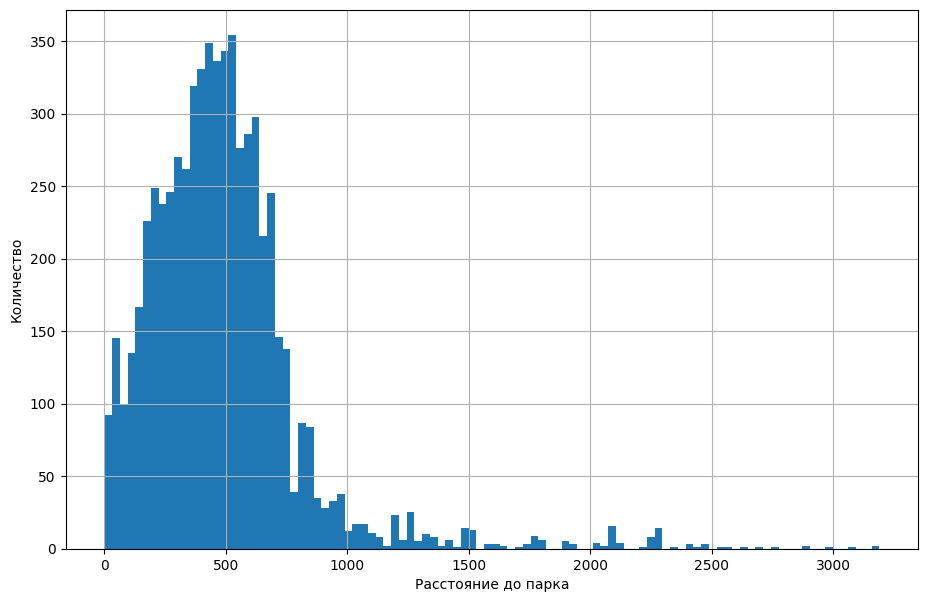

In [59]:
filtered_df['parks_nearest'].hist(bins = 100, figsize=(11, 7))
plt.xlabel('Расстояние до парка')
plt.ylabel('Количество');

In [60]:
filtered_df['parks_nearest'].describe()

count    6394.000000
mean      487.855020
std       326.215956
min         1.000000
25%       289.000000
50%       456.000000
75%       613.750000
max      3190.000000
Name: parks_nearest, dtype: float64

У нас есть всего треть значений от предобработанных данных. И в основном они расположились в средней от 289 до 612 метро - расстояние до ближайшего парка

### Изучите, как быстро продавались квартиры (days_exposition)

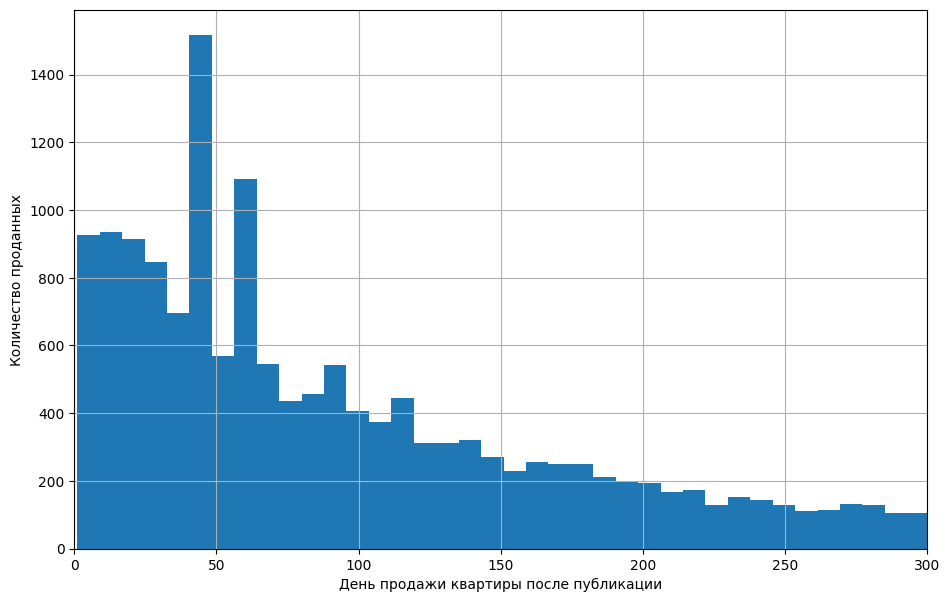

In [61]:
filtered_df['days_exposition'].hist(bins = 200, figsize=(11, 7))
plt.xlim(0,300)
plt.xlabel('День продажи квартиры после публикации')
plt.ylabel('Количество проданных');

In [62]:
filtered_df['days_exposition'].describe()

count    18323.000000
mean       171.271844
std        209.610600
min          1.000000
25%         43.000000
50%         90.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

В основном квартиры продают в первый год. В среднем это 171 дней. Однако медиана 90 дней. Такая разница потому что у нас есть хвост вправо, так как мы тут не убирали выбросы. Есть объявления, которые висят годами. Быстрыми продажами можно считать те, которые уходят в первые 25% медианного времени - это 43 дня. А то что выше 75% (217 дней) - можно считать необычайно долгими.

### Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта.

In [63]:
filtered_df[['last_price','total_area', 'living_area', 'kitchen_area', \
             'rooms', 'weekday', 'month', 'year'  ]] \
                .corr()['last_price'].sort_values(ascending = False)


last_price      1.000000
total_area      0.688781
living_area     0.575271
rooms           0.433532
kitchen_area    0.374584
year            0.006177
month           0.004844
weekday        -0.014662
Name: last_price, dtype: float64

Посмотрим на корреляцию цены с данными столбцами. Больше всего цена коррелирует с общей площадью. Зависимость не очень сильная, прямая зависимость. Как и с площадью жилой зоны,кухней и количеством комнат. А вот дата продажи, независимо это день, месяц или год - тут зависимостей нет. Для проверки зависимостей от типа этажа квартиры нам нужно столбец floor_type перевести в числовые значения. Воспользуемся циклом ниже

In [64]:
floor_type_category = []
for i in filtered_df['floor_type']:
    if i == 'first':
        floor_type_category.append(0)
    elif i == 'last':
        floor_type_category.append(2)
    else:
        floor_type_category.append(1)
filtered_df['floor_type_category'] = floor_type_category

In [65]:
filtered_df[['last_price', 'floor_type_category']].corr()['last_price']

last_price             1.000000
floor_type_category    0.032503
Name: last_price, dtype: float64

Мы видим, что корреляции тоже нет никакой от типа этажа квартиры

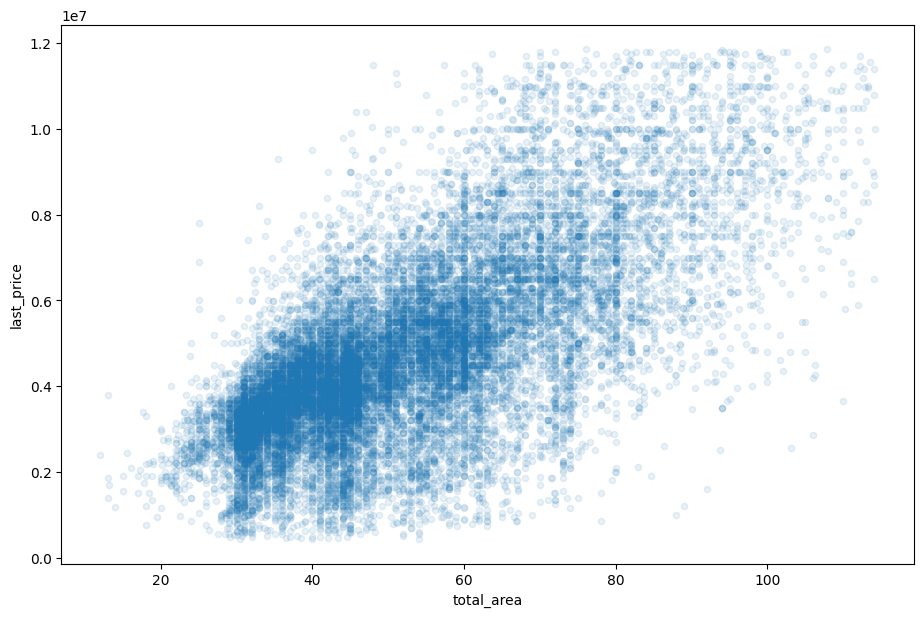

In [66]:
filtered_df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1, figsize=(11, 7));

Построим графики, которые коррелируют со столбцом last_price. Первый - total_area. Далее по списку. Здесь мы видим, что корреляция прямая, но не сильная

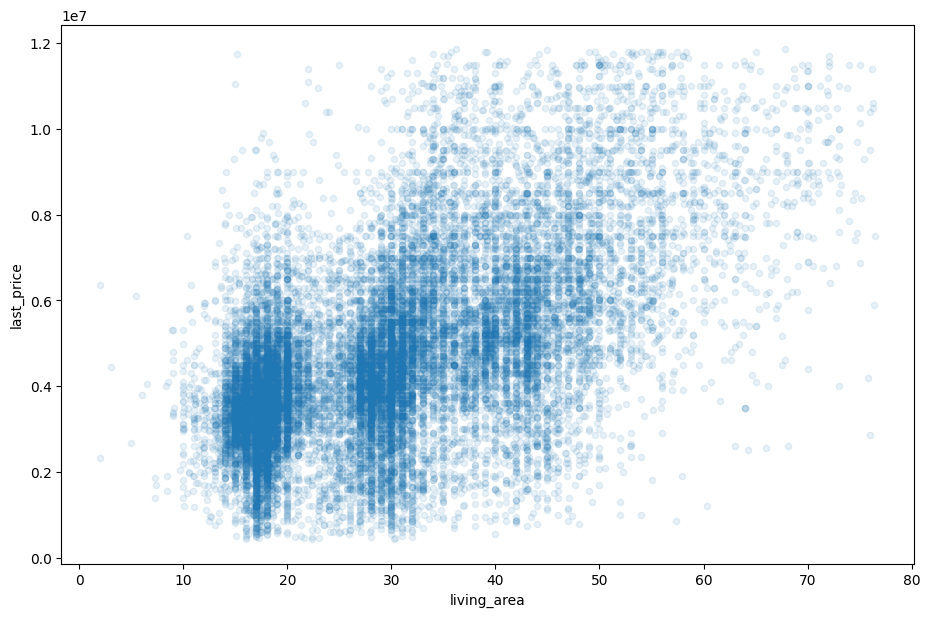

In [67]:
filtered_df.plot(y='last_price', x='living_area', kind='scatter', alpha=0.1, figsize=(11, 7));

Тоже есть корреляция, но еще меньше

Так как тут мы смотрим связь цены с категориальной переменной (количество комнат), мы используем barplot для анализа. В дальнейшем тоже будем его использовать

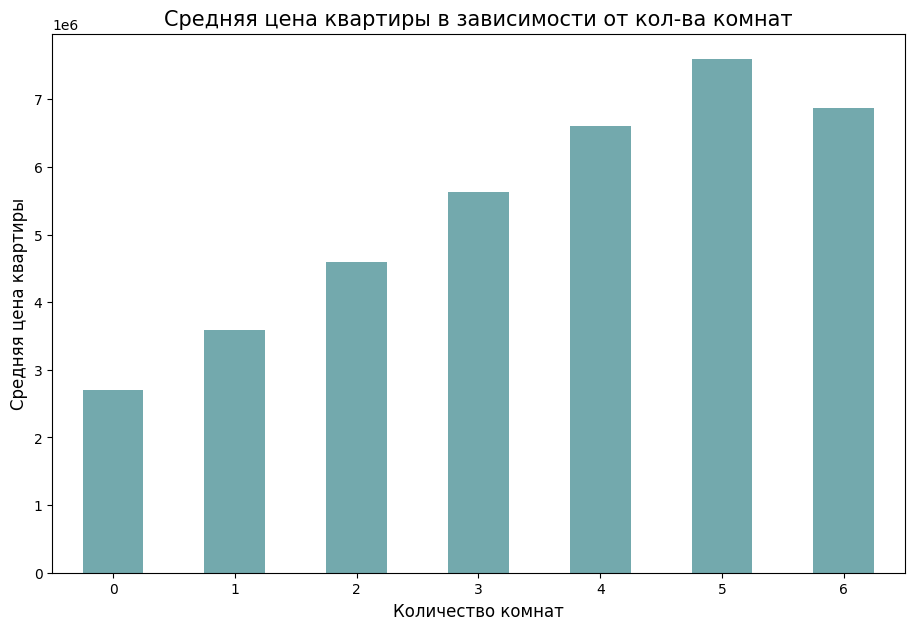

In [68]:
filtered_df.groupby('rooms')['last_price'].median().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0) 
plt.title('Средняя цена квартиры в зависимости от кол-ва комнат', size=15)
plt.xlabel('Количество комнат', size=12)
plt.ylabel('Средняя цена квартиры', size=12);


Количество комнан напрямую влияет на цену квартиры. Правда из корреляции выше нельзя сказать, что влияние сильное

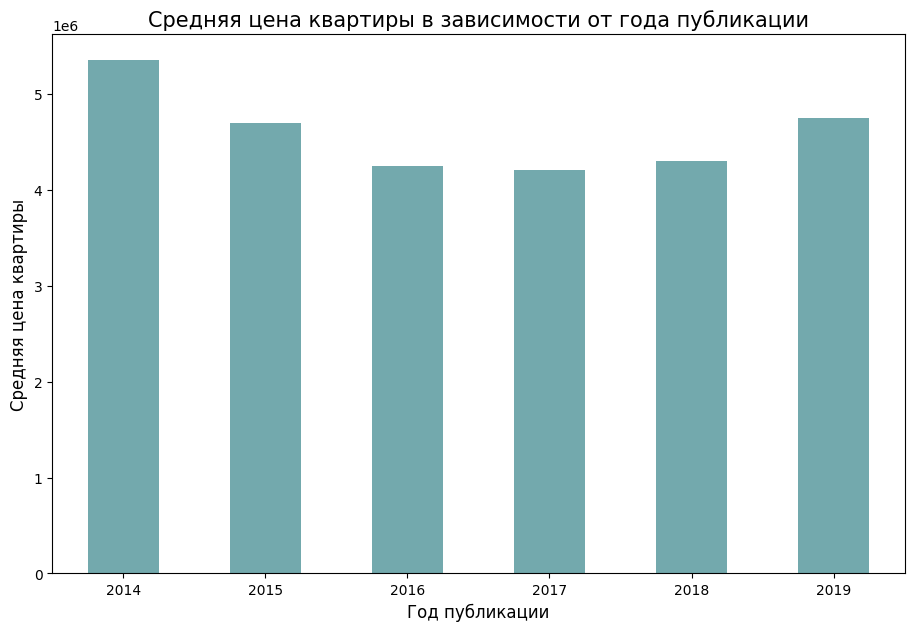

In [69]:
filtered_df.groupby('year')['last_price'].median().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0) 
plt.title('Средняя цена квартиры в зависимости от года публикации', size=15)
plt.xlabel('Год публикации', size=12)
plt.ylabel('Средняя цена квартиры', size=12);

После 2014 года было ежегодное падение цены. С 2018 начался подъем

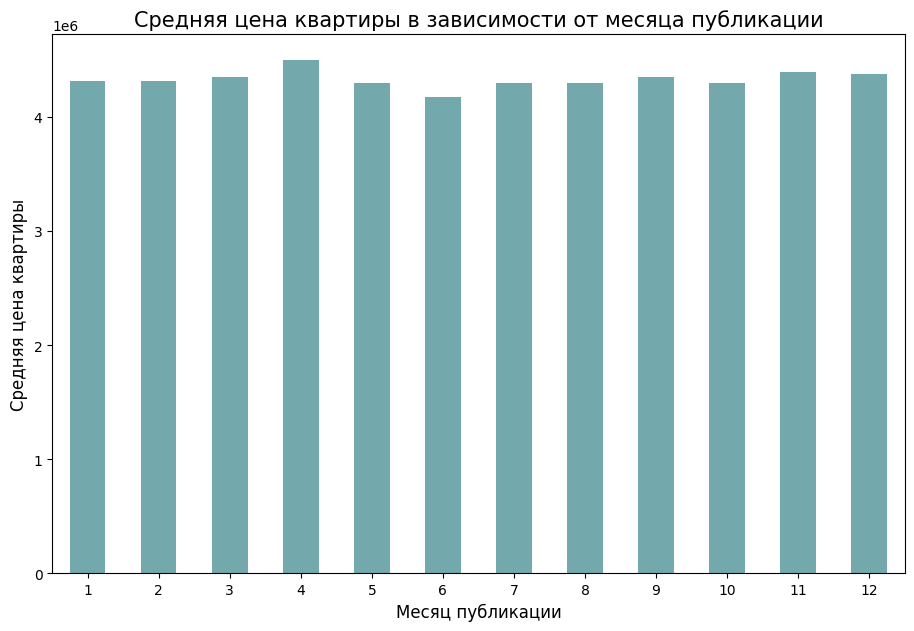

In [70]:
filtered_df.groupby('month')['last_price'].median().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0) 
plt.title('Средняя цена квартиры в зависимости от месяца публикации', size=15)
plt.xlabel('Месяц публикации', size=12)
plt.ylabel('Средняя цена квартиры', size=12);

Нет никакой зависимости от месяца публикации, никак не влияет на цену

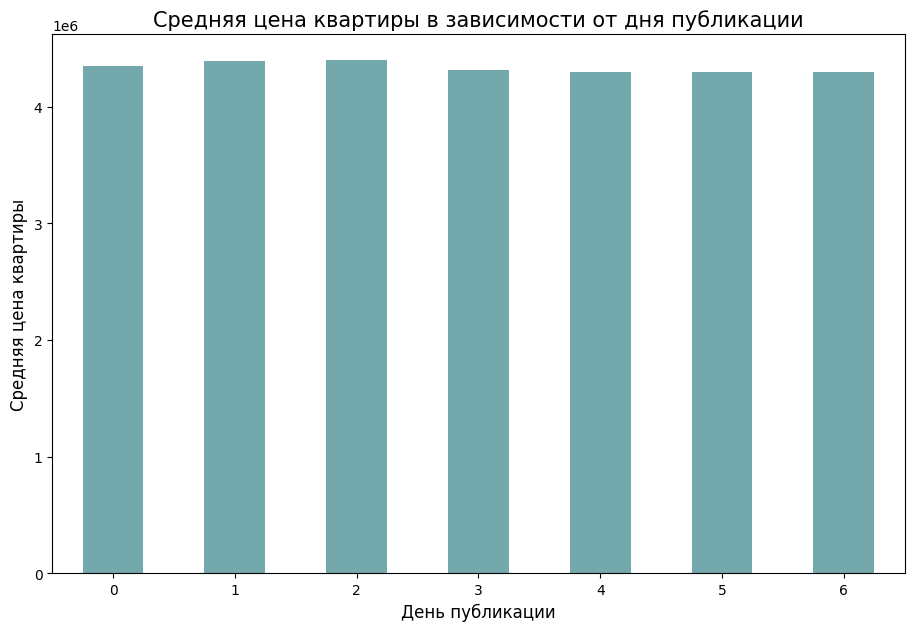

In [71]:
filtered_df.groupby('weekday')['last_price'].median().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0) 
plt.title('Средняя цена квартиры в зависимости от дня публикации', size=15)
plt.xlabel('День публикации', size=12)
plt.ylabel('Средняя цена квартиры', size=12);

Нет никакой зависимости от дня недели

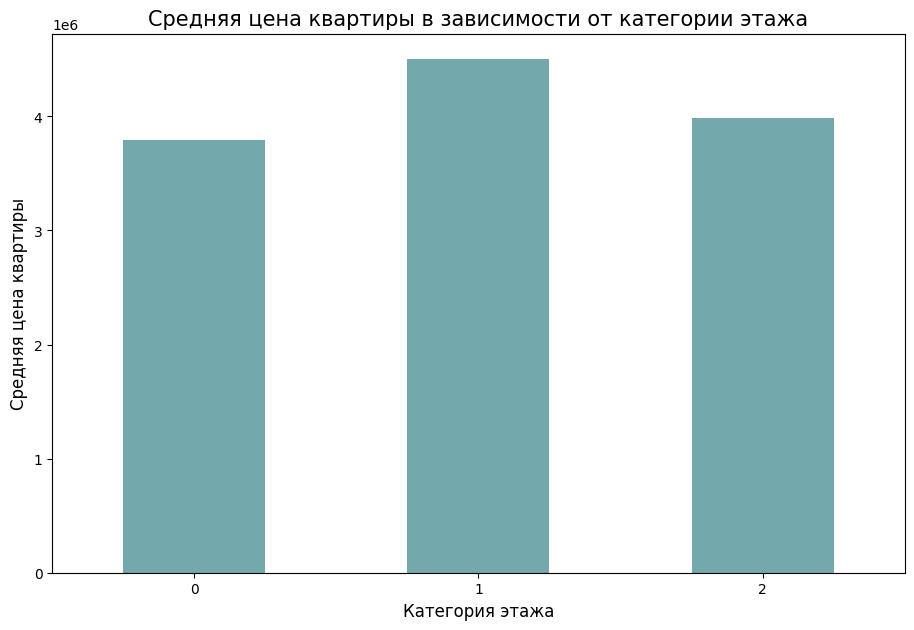

In [72]:
filtered_df.groupby('floor_type_category')['last_price'].median().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0) 
plt.title('Средняя цена квартиры в зависимости от категории этажа', size=15)
plt.xlabel('Категория этажа', size=12)
plt.ylabel('Средняя цена квартиры', size=12);

Первый этаж - 0, последний - 2, остальные - 1. Первые или последние этажи стоят дешевле, чем все остальные

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»

Сначала отсортируем таблицу по топ-10 населенным пункам по объявлениям

In [73]:
top10_local = filtered_df['locality_name'].value_counts().head(10).index

top10_df = filtered_df[filtered_df['locality_name'].isin(top10_local)]
top10_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday,month,year,floor_type,city_сenter_km,floor_type_category
0,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600,1,True,...,0.0,NaN,81.0,82920.79,1,12,2018,first,19,0
1,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300,4,True,...,2.0,574.0,558.0,92785.71,3,8,2015,another,14,1
3,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600,6,True,...,0.0,NaN,155.0,99195.71,3,11,2017,another,19,1
4,5,7915000.0,71.60,2019-04-18,2,2.65,24,40.096,22,True,...,0.0,NaN,NaN,110544.69,3,4,2019,another,12,1
5,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430,26,True,...,NaN,NaN,189.0,87454.76,2,5,2018,another,<NA>,1


In [74]:
locality_name_pivot = pd.pivot_table(top10_df, index = 'locality_name', values = 'price_meter' ).reset_index()
locality_name_pivot.sort_values(by = 'price_meter', ascending = False)

,locality_name,price_meter
5,Санкт-Петербург,105415.870253
4,Пушкин,100030.518988
6,деревня Кудрово,92938.326312
8,поселок Парголово,90185.293727
7,поселок Мурино,85630.005751
9,поселок Шушары,78576.772315
3,Колпино,75237.833082
2,Гатчина,68545.043467
0,Всеволожск,67000.737539
1,Выборг,58025.115336


В результате оценки топ-10 населенных пунктов по количествам объявлений самая большая стоимость 1 квадратного метра в Санкт-Петербурге. В топ-3 Пушкин и Кудрово. Замыкает список Выборг

### Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

Отсортируем по Санкт-Петербургу и оставим только 2 интересующие нас колонки

In [75]:
filtered_df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday,month,year,floor_type,city_сenter_km,floor_type_category
0,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,0.0,NaN,81.0,82920.79,1,12,2018,first,19,0
1,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,2.0,574.0,558.0,92785.71,3,8,2015,another,14,1


In [76]:
filtered_df_km = filtered_df[['locality_name','city_сenter_km', 'last_price']].query('locality_name == "Санкт-Петербург"')
filtered_df_km.isna().sum()

locality_name      0
city_сenter_km    38
last_price         0
dtype: int64

Всего 38 значений city_сenter_km с пропусками, удалим их

In [77]:
filtered_df_km = filtered_df_km.dropna().reset_index(drop = True)
filtered_df_km.head(3)

,locality_name,city_сenter_km,last_price
0,Санкт-Петербург,14,5196000.0
1,Санкт-Петербург,12,7915000.0
2,Санкт-Петербург,15,5400000.0


In [78]:
df_center_km = filtered_df_km.groupby('city_сenter_km', as_index = False)['last_price'].mean().astype('int')
df_center_km.head(3)

,city_сenter_km,last_price
0,0,8053333
1,1,8034402
2,2,7691132


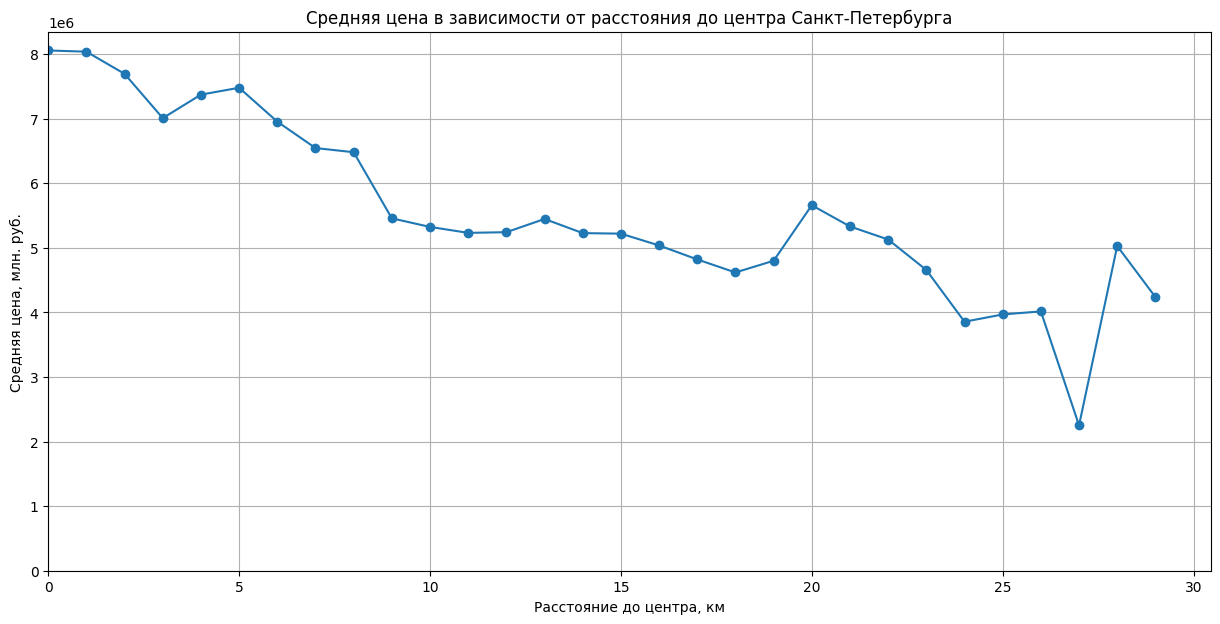

In [79]:
plt.figure(figsize=(15,7))
plt.plot(df_center_km['city_сenter_km'], df_center_km['last_price'], marker = 'o')
plt.title('Средняя цена в зависимости от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена, млн. руб.')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid(True);

По данному графику мы видим, как цена квартир уменьшается при отдалении в каждый километр от центра города. В среднем цена падает с 8 миллионов до 4 миллионов

## Общий вывод

**Общие выводы по проекту анализа данных по продаже квартир через сервис Яндекс Недвижимость:**
1) Были удалены некоторые строки с пропущенными значениями в важных для анализа столбцах. Пропущенные значения во многих столбцах были заменены на 0 или на False, где это логически подходило. Подставили подходящие значения в living_area, необходимо для анализа. Избавились от неявных дубликатов в графе с наименованием населенных пунктов. Привели столбцы датафрейма к удобным для нас форматам. Удалили аномально высокие значения в интересующих нас столбцах, всё, что выходит за пределы "усов" (выбросы).
2) Были созданы столбцы: цена одного квадратного метра, день недели публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах. Необходимы для дальнейшего анализа.
3) Был проведен исследовательский анализ данных, построены гистограммы для некоторых столбцов, отсечены аномалии. По этим данным мы можем сказать, что в основном площадь квартир от 38 до 62 квадратных метров. Цена варьируется от 3 до 6 миллионов при средней примерно около 4,5-4,7 млн. В основном это 1 или 2-комнантые квартиры в 5 или 9-этажном доме.
4) В среднем срок продажи квартиры 171 дней. Однако медиана 90 дней. Такая разница потому что у нас есть хвост вправо, так как мы тут не убирали выбросы. Есть объявления, которые висят годами. Быстрыми продажами можно считать те, которые уходят в первые 25% медианного времени - это 43 дня. А то что выше 75% (217 дней) - долгие.
5) Больше всего на общую стоимость объекта влияют общая площадь, жилая площадь и количество комнат.
6) В результате оценки топ-10 населенных пунктов по количествам объявлений самая большая стоимость 1 квадратного метра в Санкт-Петербурге. В топ-3 Пушкин и Кудрово. Замыкает список Выборг.
7) Также мы посмотрели, как падает цена на квартиры с каждым пройденным от центра Санкт-Петербурга километром. С 8 миллионов до 4 при удалении на 28 километров.